## Mortality Rate Dataset

-Manoj Deshmukh

### Data Description: Data is collected by health workers from a wide range of patients. This data set consists of a variety of attributes that explains different symptoms and different immunity levels of patients.

### Goal: Build a Machine learning model that can predict the mortality rate based on different symptoms and the patient’s condition.

Import all required libraries in Jupyter Notebook

In [384]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression as fs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Load dataset

Read the given excel file in the notebook

In [385]:
filename="E:\\Data Analysis\\Python_spyder\\Assesment\\Mortality_rate\\training_data.xlsx"
mortality=pd.read_excel(filename)

### Info about dataset

Print top records of the dataset, to check that the dataset is correctly loaded

In [386]:
mortality.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
mortality.shape

(475, 91)

In [388]:
(mortality.dtypes).head(15)

ID                                      int64
Severity                               object
Ventilation                            object
Mean Age                              float64
% Male                                float64
Any Comorbidity                       float64
Hypertension                          float64
Diabetes                              float64
Cardiovascular Disease (incl. CAD)    float64
Chronic obstructive lung (COPD)       float64
Cancer (Any)                          float64
Liver Disease (any)                   float64
Cerebrovascular Disease               float64
Chronic kidney/renal disease          float64
Other                                 float64
dtype: object

Check for singularity of categorical attributes

In [389]:
print('Severity')
print(mortality['Severity'].value_counts())
print(' ')
print('Ventilation')
print(mortality['Ventilation'].value_counts())

Severity
All                     211
Severe/Critical Only    144
Mild only                91
Both                      5
Mild                      2
Severe/critical only      2
Severe                    2
Asymptomatic only         1
Name: Severity, dtype: int64
 
Ventilation
Both                    197
Non-ventilation only     66
Ventilation only         19
Yes                      12
ΝΑ                        4
No                        3
Name: Ventilation, dtype: int64


Drop insignificant features

In [390]:
mortality=mortality.drop(['ID'],axis=1)

### Data cleansing

Check for Null values in all attributes

In [391]:
mortality.isnull().sum()
print('Shape of dataset:', mortality.shape)
(mortality.isnull().sum() * 100 / len(mortality)).head(15)

Shape of dataset: (475, 90)


Severity                               3.578947
Ventilation                           36.631579
Mean Age                              46.947368
% Male                                 9.473684
Any Comorbidity                       53.263158
Hypertension                          34.947368
Diabetes                              31.578947
Cardiovascular Disease (incl. CAD)    37.894737
Chronic obstructive lung (COPD)       44.842105
Cancer (Any)                          50.947368
Liver Disease (any)                   59.578947
Cerebrovascular Disease               63.578947
Chronic kidney/renal disease          47.368421
Other                                 58.105263
Fever (temperature ≥37·3°C)           25.052632
dtype: float64

Most of the dataset contains attributes with more than 75% of Null values and replacing huge amount of data is not good for our model.
So, we will remove those columns containing more than 75% Null values

In [392]:
column_with_nan = mortality.columns[mortality.isnull().any()]

for column in column_with_nan:
    if mortality[column].isnull().sum()*100.0/mortality.shape[0] > 75:
        mortality.drop(column,1, inplace=True)

print('Shape after first Null removal operation:', mortality.shape)
(mortality.isnull().sum() * 100 / len(mortality)).tail(15)

Shape after first Null removal operation: (475, 45)


Lymphocyte Count (10^9/L) - Median    39.157895
Lymphocyte Count (10^9/L) - LQ        50.105263
Lymphocyte Count (10^9/L) - UQ        50.105263
Platelet Count (10^9/L) - Median      62.105263
Platelet Count (10^9/L) - LQ          65.894737
Platelet Count (10^9/L) - UQ          65.894737
Hemoglobin (g/L) - Median             71.789474
Hemoglobin (g/L) - LQ                 74.105263
Hemoglobin (g/L) - UQ                 74.105263
Alanine Aminotransferase (U/L)        61.263158
Aspartate Aminotransferase (U/L)      62.947368
Antibiotic                            68.842105
Antiviral (Any)                       58.105263
Hospital length of stay, days         61.473684
Mortality                              0.000000
dtype: float64

first use forward fill to replace null values, by directly replacing null with mean ,mode or median will create bias in the dataset as most of the values have more than half of the data as null

In [393]:
mortality.fillna( method ='ffill', inplace = True)
(mortality.isnull().sum() * 100 / len(mortality)).tail(15)

Lymphocyte Count (10^9/L) - Median    0.000000
Lymphocyte Count (10^9/L) - LQ        0.000000
Lymphocyte Count (10^9/L) - UQ        0.000000
Platelet Count (10^9/L) - Median      0.000000
Platelet Count (10^9/L) - LQ          0.000000
Platelet Count (10^9/L) - UQ          0.000000
Hemoglobin (g/L) - Median             0.000000
Hemoglobin (g/L) - LQ                 0.000000
Hemoglobin (g/L) - UQ                 0.000000
Alanine Aminotransferase (U/L)        0.000000
Aspartate Aminotransferase (U/L)      0.631579
Antibiotic                            0.000000
Antiviral (Any)                       0.000000
Hospital length of stay, days         0.000000
Mortality                             0.000000
dtype: float64

Still some of the columns contain null values in the dataset

In [394]:
na = mortality.isnull().any()
nullCols = na.index[na].tolist()
nullCols

['Mean Age',
 'Liver Disease (any)',
 'Cerebrovascular Disease',
 'Shortness of Breath (dyspnoea)',
 'Headache',
 'Disease Severity Asymptomatic',
 'Aspartate Aminotransferase (U/L)']

Replace null values by taking mean of perticular column

In [395]:
column_means = mortality.mean()
mortality = mortality.fillna(column_means)
(mortality.isnull().sum() * 100 / len(mortality)).tail(15)

Lymphocyte Count (10^9/L) - Median    0.0
Lymphocyte Count (10^9/L) - LQ        0.0
Lymphocyte Count (10^9/L) - UQ        0.0
Platelet Count (10^9/L) - Median      0.0
Platelet Count (10^9/L) - LQ          0.0
Platelet Count (10^9/L) - UQ          0.0
Hemoglobin (g/L) - Median             0.0
Hemoglobin (g/L) - LQ                 0.0
Hemoglobin (g/L) - UQ                 0.0
Alanine Aminotransferase (U/L)        0.0
Aspartate Aminotransferase (U/L)      0.0
Antibiotic                            0.0
Antiviral (Any)                       0.0
Hospital length of stay, days         0.0
Mortality                             0.0
dtype: float64

###### From above output it is clear that dataset now has no Nulls

By observing the data, we can see that data has some insignifiant values as 'NA', 'na' and '0%%', So replace these values by mode of that column.

In [396]:
print(mortality['Ventilation'].value_counts())
mortality['Ventilation'].mode()
mortality['Ventilation'].replace({"ΝΑ":'Both'}, inplace=True)
print('')
print('After replacing')
print(mortality['Ventilation'].value_counts())

Both                    321
Non-ventilation only     89
Ventilation only         44
Yes                      12
ΝΑ                        6
No                        3
Name: Ventilation, dtype: int64

After replacing
Both                    327
Non-ventilation only     89
Ventilation only         44
Yes                      12
No                        3
Name: Ventilation, dtype: int64


In [397]:
# replace na by mode, in Hospital length of stay, days column and convert to float
mortality.dtypes
mortality["Hospital length of stay, days"].replace({"na":'12'}, inplace=True)
mortality['Hospital length of stay, days'] = mortality['Hospital length of stay, days'].astype('float64')

# replace na by 0, in Mortality column
mortality["Mortality"].replace({"na":'0'}, inplace=True)
mortality["Mortality"].replace({"0%%":'0'}, inplace=True)
mortality['Mortality'] = mortality['Mortality'].astype('float64')

Summarise the dataset

In [398]:
mortality.describe()

,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,...,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),"Hospital length of stay, days",Mortality
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,...,475.000000,475.000000,475.000000,475.000000,475.0000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,52.534459,0.552919,0.470121,0.300028,0.147736,0.137436,0.070752,0.092709,0.045248,0.076061,...,224.002400,116.133411,102.290695,121.192905,31.8708,35.830975,0.692735,0.873492,14.938758,0.187305
std,19.215927,0.253803,0.340182,0.269992,0.177974,0.214599,0.154888,0.232856,0.074087,0.279208,...,43.534926,39.834726,44.138431,49.573382,18.5842,16.930652,0.380815,0.250336,7.649518,0.323059
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.000000,6.710000,0.000000,13.200000,6.0000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.458150,0.219000,0.111000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,202.000000,122.700000,101.950000,131.300000,23.8000,27.000000,0.431650,0.842000,11.000000,0.000000
50%,53.000000,0.547000,0.401500,0.237000,0.114000,0.075000,0.027800,0.009200,0.029000,0.026000,...,219.000000,130.000000,119.000000,143.930000,28.0000,32.000000,0.909000,1.000000,15.000000,0.000000
75%,64.000000,0.680000,0.734000,0.444400,0.210250,0.160500,0.080000,0.057500,0.056000,0.080000,...,249.950000,137.000000,128.000000,151.000000,34.2700,38.100000,1.000000,1.000000,18.150000,0.230000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.600000,...,503.000000,163.000000,163.000000,163.000000,172.0000,219.200000,1.000000,1.000000,55.000000,1.000000


Check for correlation

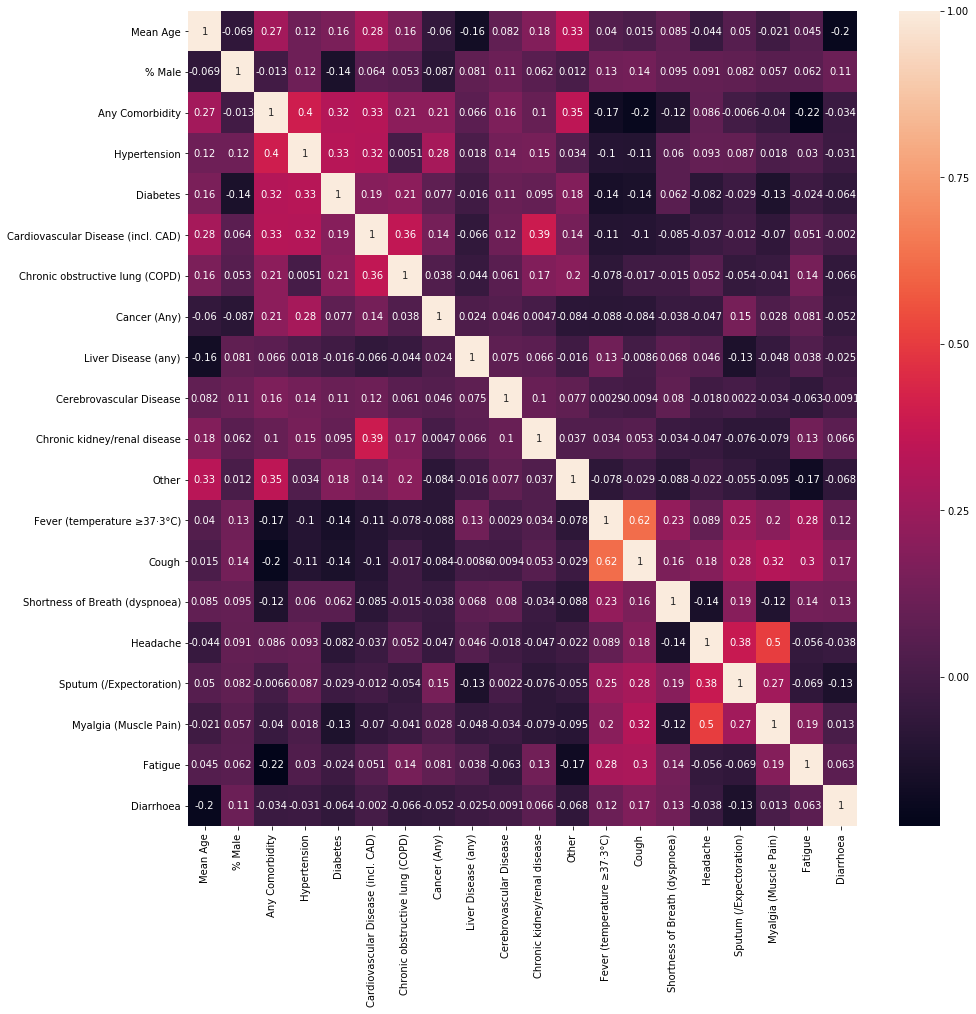

In [399]:
totalcols=len(mortality.columns)
corrMatrix = mortality.iloc[:,2:22].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)

###### from above heatmap we can clearly see most of the attributes are not much correlated, so we cannot use PCA to reduce dimenstionality in the dataset

In [400]:
corr_matrix = mortality.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

print(len(to_drop))
print(to_drop)

3
['Lymphocyte Count (10^9/L) - LQ', 'Lymphocyte Count (10^9/L) - UQ', 'Hemoglobin (g/L) - UQ']


Drop columns which are highly correlated, as high correlation is not good for model building. 

In [401]:
mortality.drop(to_drop, axis=1, inplace=True)
print('Final Shape of the Dataset:', mortality.shape)

Final Shape of the Dataset: (475, 42)


### Dummy variables

Create dummy variables as linear regression cannot handle categorical variabls directly

In [402]:
mortality=pd.get_dummies(mortality)
mortality.shape
mortality.dtypes

import warnings
warnings.filterwarnings('ignore')

# relocate y-variable Mortality as last column
totalcols=len(mortality.columns)
idx=mortality.columns.get_loc("Mortality")
mort=mortality.iloc[:,idx]
mortality=mortality.drop(['Mortality'],axis=1)
mortality['Mortality']=mort
mortality.shape

(475, 53)

### Model building

Split the dataset into independent and dependent variables, and then into training and validation dataset

In [403]:
train,test=train_test_split(mortality,test_size=0.3)
print('train={},test={}'.format(train.shape,test.shape))

totalcols=len(mortality.columns)

# split the training data into train/test
trainX=train.iloc[:,0:totalcols-1]
trainY=train.iloc[:,totalcols-1]

testX=test.iloc[:,0:totalcols-1]
testY=test.iloc[:,totalcols-1]

print('trainX={},trainY={},testX={},testY={}'.format(trainX.shape,trainY.shape,testX.shape,testY.shape))

train=(332, 53),test=(143, 53)
trainX=(332, 52),trainY=(332,),testX=(143, 52),testY=(143,)


Add constant term to the independent variables as sm.OLS does'nt add constant directly into the model building, So we need to add constant manually

In [404]:
trainX=sm.add_constant(trainX)
testX=sm.add_constant(testX)

Build the model using linear regression algorithm

In [405]:
base_model=sm.OLS(trainY,trainX).fit()

Get summary of the base model

In [406]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     8.389
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           4.02e-33
Time:                        15:04:00   Log-Likelihood:                 73.924
No. Observations:                 332   AIC:                            -45.85
Df Residuals:                     281   BIC:                             148.2
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0094      0.139     -0.067      0.946      -0.284       0.265
Mean Age                                     0.0014      0.001      1.703      0.090      -0.000       0.003
% Male                                      -0.0484      0.054     -0.899      0.370      -0.154       0.058
Any Comorbidity                              0.1024      0.051      2.002      0.046       0.002       0.203
Hypertension                                 0.1540      0.058      2.648      0.009       0.040       0.268
Diabetes                                    -0.0232      0.089     -0.260      0.795      -0.199       0.153
Cardiovascular Disease (incl. CAD)           0.1088      0.076      1.441      0.151      -0.040       0.257
Chronic obstructive lung (COPD)             -0.0293      0.091     -0.321      0.749      -0.209       0.150
Cancer (Any)                                 0.0359      0.069      0.520      0.604      -0.100       0.172
Liver Disease (any)                         -0.6655      0.258     -2.581      0.010      -1.173      -0.158
Cerebrovascular Disease                     -0.0650      0.137     -0.475      0.635      -0.334       0.204
Chronic kidney/renal disease                 0.3521      0.132      2.665      0.008       0.092       0.612
Other                                       -0.1481      0.058     -2.536      0.012      -0.263      -0.033
Fever (temperature ≥37·3°C)                  0.0086      0.060      0.145      0.885      -0.109       0.126
Cough                                       -0.0676      0.065     -1.045      0.297      -0.195       0.060
Shortness of Breath (dyspnoea)               0.1228      0.056      2.189      0.029       0.012       0.233
Headache                                     0.1399      0.084      1.659      0.098      -0.026       0.306
Sputum (/Expectoration)                     -0.0512      0.067     -0.767      0.444      -0.182       0.080
Myalgia (Muscle Pain)                        0.0123      0.061      0.202      0.840      -0.107       0.132
Fatigue                                     -0.1771      0.060     -2.942      0.004      -0.296      -0.059
Diarrhoea                                   -0.1087      0.066     -1.655      0.099      -0.238       0.021
Nausea or Vomiting                           0.1924      0.071      2.728      0.007       0.054       0.331
Disease Severity Asymptomatic               -0.0025      0.133     -0.018      0.985      -0.265       0.260
Disease Severity General                    -0.0033      0.035     -0.095      0.924      -0.072       0.065
Disease Severity Severe                      0.1160      0.045      2.602      0.010       0.028       0.204
Disease Severity Critical      

Predict the dependent values on validation data using basemodel

In [407]:
predbase=round(base_model.predict(testX),2)

### Evaluation of the model

Print out evaluation metrics of the basemodel

In [408]:
sse=round(sum((testY-predbase)**2),4)
mse=round(metrics.mean_squared_error(testY, predbase),4)
mae=round(metrics.mean_absolute_error(testY, predbase),4)
r2=round(base_model.rsquared,4)
print('SSE={}, MSE={}, MAE={}, R2={}'.format(sse,mse, mae,r2))

SSE=9.5578, MSE=0.0668, MAE=0.195, R2=0.5988


### Feature selection

Select features which are significant, remove those features who have p-value greater than 0.05

In [409]:
features=fs(trainX.iloc[:,1:totalcols-1],trainY,center=True)
list(features[0])

dffeatures=pd.DataFrame({'columns':trainX.columns[1:totalcols-1],'score':features[0],'p_value':features[1]})

dffeatures.isnull().sum()
dffeatures = dffeatures.dropna(axis=0, subset=['score'])

dffeatures=dffeatures[dffeatures.p_value > 0.05]
dffeatures

,columns,score,p_value
1,% Male,0.155709,0.693393
6,Chronic obstructive lung (COPD),2.318428,0.128807
7,Cancer (Any),0.452083,0.501818
8,Liver Disease (any),1.123573,0.289926
9,Cerebrovascular Disease,3.528883,0.061190
14,Shortness of Breath (dyspnoea),1.487219,0.223519
15,Headache,0.285855,0.593249
16,Sputum (/Expectoration),0.007424,0.931388
17,Myalgia (Muscle Pain),2.824936,0.093757
22,Disease Severity General,0.256021,0.613205


Create a dataframe containing only significant features

In [410]:
mortality1=mortality.drop([mortality.columns[1], mortality.columns[6], mortality.columns[7], mortality.columns[8],
                           mortality.columns[14], mortality.columns[15], mortality.columns[16], 
                           mortality.columns[24],mortality.columns[28], mortality.columns[34], 
                           mortality.columns[35],mortality.columns[37], mortality.columns[41], 
                           mortality.columns[42],mortality.columns[46], mortality.columns[48], 
                           mortality.columns[50]], axis=1)

In [411]:
mortality1.shape

(475, 36)

### Model building on feature selection

Split new dataset into independent and dependent variables and then into training and validation dataset

In [412]:
train,test=train_test_split(mortality1,test_size=0.3)
print('train={},test={}'.format(train.shape,test.shape))

totalcols=len(mortality1.columns)

trainX=train.iloc[:,0:totalcols-1]
trainY=train.iloc[:,totalcols-1]

testX=test.iloc[:,0:totalcols-1]
testY=test.iloc[:,totalcols-1]

print('trainX={},trainY={},testX={},testY={}'.format(trainX.shape,trainY.shape,testX.shape,testY.shape))


train=(332, 36),test=(143, 36)
trainX=(332, 35),trainY=(332,),testX=(143, 35),testY=(143,)


Add constant term to the independent variables

In [413]:
trainX=sm.add_constant(trainX)
testX=sm.add_constant(testX)

build the linear regression model

In [414]:
fs1_model=sm.OLS(trainY,trainX).fit()

summarize the feature selection model

In [415]:
fs1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     10.63
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           6.45e-35
Time:                        15:04:01   Log-Likelihood:                 38.216
No. Observations:                 332   AIC:                            -4.432
Df Residuals:                     296   BIC:                             132.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1289      0.186     -0.693      0.489      -0.495       0.237
Mean Age                                     0.0014      0.001      1.728      0.085      -0.000       0.003
Any Comorbidity                              0.0886      0.050      1.762      0.079      -0.010       0.188
Hypertension                                 0.1965      0.058      3.394      0.001       0.083       0.310
Diabetes                                     0.0324      0.088      0.367      0.714      -0.141       0.206
Cardiovascular Disease (incl. CAD)           0.0813      0.070      1.155      0.249      -0.057       0.220
Cerebrovascular Disease                      0.0040      0.042      0.095      0.924      -0.078       0.086
Chronic kidney/renal disease                 0.2587      0.223      1.162      0.246      -0.180       0.697
Other                                       -0.0951      0.062     -1.540      0.125      -0.217       0.026
Fever (temperature ≥37·3°C)                  0.0093      0.056      0.165      0.869      -0.101       0.120
Cough                                       -0.0726      0.060     -1.205      0.229      -0.191       0.046
Myalgia (Muscle Pain)                        0.0375      0.060      0.627      0.531      -0.080       0.155
Fatigue                                     -0.1419      0.058     -2.444      0.015      -0.256      -0.028
Diarrhoea                                   -0.0709      0.066     -1.067      0.287      -0.202       0.060
Nausea or Vomiting                           0.1670      0.072      2.309      0.022       0.025       0.309
Disease Severity Asymptomatic               -0.0312      0.101     -0.311      0.756      -0.229       0.167
Disease Severity General                     0.0574      0.035      1.633      0.104      -0.012       0.127
Disease Severity Severe                      0.0956      0.042      2.256      0.025       0.012       0.179
White Blood Cell Count (10^9/L) - Median    -0.0002      0.012     -0.021      0.984      -0.023       0.022
White Blood Cell Count (10^9/L) - LQ         0.0373      0.012      3.002      0.003       0.013       0.062
White Blood Cell Count (10^9/L) - UQ         0.0081      0.006      1.289      0.198      -0.004       0.021
Platelet Count (10^9/L) - Median         -6.802e-05      0.001     -0.094      0.926      -0.001       0.001
Platelet Count (10^9/L) - LQ                 0.0001      0.001      0.210      0.834      -0.001       0.001
Platelet Count (10^9/L) - UQ                -0.0003      0.000     -0.757      0.449      -0.001       0.000
Hemoglobin (g/L) - Median                    0.0008      0.001      1.190      0.235      -0.001       0.002
Hemoglobin (g/L) - LQ          

predictions on the new model

In [416]:
predfs1=round(fs1_model.predict(testX),2)

### Evaluating model

Evaluating the feature selected model

In [417]:
ssef=round(sum((testY-predfs1)**2),4)
msef=round(metrics.mean_squared_error(testY, predfs1),4)
maef=round(metrics.mean_absolute_error(testY, predfs1),4)
r2f=round(fs1_model.rsquared,4)
print('Basemodel Evaluation: SSE={}, MSE={}, MAE={}, R2={}'.format(sse,mse,mae,r2))
print('Feature Evaluation: SSEf={}, MSEf={}, MAEf={}, R2f={}'.format(ssef,msef,maef,r2f))

Basemodel Evaluation: SSE=9.5578, MSE=0.0668, MAE=0.195, R2=0.5988
Feature Evaluation: SSEf=6.9841, MSEf=0.0488, MAEf=0.1683, R2f=0.5569


###### We can see, results obtained using significant feature model are slightly better than basemodel

### Scaled Model

Scale the numerical features into 0 and 1, to remove skewness

In [418]:
indx=mortality.columns.get_loc("Severity_All")

In [419]:
from sklearn import preprocessing
# make a copy of oroginal dataset
mortality_std=mortality.copy(deep=True)

# convert the data into scaled data
totalcols=len(mortality.columns)

minmax=preprocessing.MinMaxScaler()
scaledvals=minmax.fit_transform(mortality_std.iloc[:,0:indx])

mortality_std.iloc[:,0:39]=scaledvals

In [420]:
mortality_std.head(5)

,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,...,Severity_Mild only,Severity_Severe,Severity_Severe/Critical Only,Severity_Severe/critical only,Ventilation_Both,Ventilation_No,Ventilation_Non-ventilation only,Ventilation_Ventilation only,Ventilation_Yes,Mortality
0,0.524536,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,0.045248,0.013582,...,0,0,0,0,1,0,0,0,0,0.28
1,0.524536,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,0.045248,0.013582,...,0,0,1,0,1,0,0,0,0,1.00
2,0.524536,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,0.045248,0.013582,...,0,0,0,0,1,0,0,0,0,0.00
3,0.524536,0.6030,0.4015,0.2336,0.1160,0.0146,0.0146,0.0300,0.045248,0.011607,...,0,0,0,0,1,0,0,0,0,0.16
4,0.524536,0.6160,0.4015,0.2336,0.1010,0.0146,0.0146,0.0510,0.045248,0.009107,...,0,0,0,0,1,0,0,0,0,0.15


### Model building

Split the dataset into independent and dependent variables, and then into training and validation dataset

In [421]:
train,test=train_test_split(mortality_std,test_size=0.3)
print('train={},test={}'.format(train.shape,test.shape))

totalcols=len(mortality1.columns)

trainX=train.iloc[:,0:totalcols-1]
trainY=train.iloc[:,totalcols-1]

testX=test.iloc[:,0:totalcols-1]
testY=test.iloc[:,totalcols-1]

print('trainX={},trainY={},testX={},testY={}'.format(trainX.shape,trainY.shape,testX.shape,testY.shape))


train=(332, 53),test=(143, 53)
trainX=(332, 35),trainY=(332,),testX=(143, 35),testY=(143,)


Add constant term to the independent variables as sm.OLS does'nt add constant directly into the model building, So we need to add constant manually

In [422]:
trainX=sm.add_constant(trainX)
testX=sm.add_constant(testX)

Build model on scaled data

In [423]:
scl_model=sm.OLS(trainY,trainX).fit()

Summary of the scaled model

In [424]:
scl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Aspartate Aminotransferase (U/L)   R-squared:                       0.712
Model:                                          OLS   Adj. R-squared:                  0.678
Method:                               Least Squares   F-statistic:                     20.92
Date:                              Mon, 14 Sep 2020   Prob (F-statistic):           6.70e-61
Time:                                      15:04:03   Log-Likelihood:                 539.64
No. Observations:                               332   AIC:                            -1007.
Df Residuals:                                   296   BIC:                            -870.3
Df Model:                                        35                                         
Covariance Type:                          nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0192      0.028     -0.696      0.487      -0.073       0.035
Mean Age                                     0.0061      0.019      0.313      0.754      -0.032       0.044
% Male                                      -0.0062      0.012     -0.516      0.606      -0.030       0.017
Any Comorbidity                             -0.0047      0.011     -0.420      0.675      -0.027       0.017
Hypertension                                 0.0236      0.013      1.769      0.078      -0.003       0.050
Diabetes                                     0.0058      0.018      0.331      0.741      -0.029       0.040
Cardiovascular Disease (incl. CAD)          -0.0050      0.017     -0.298      0.766      -0.038       0.028
Chronic obstructive lung (COPD)              0.0120      0.022      0.553      0.581      -0.031       0.055
Cancer (Any)                                -0.0223      0.015     -1.450      0.148      -0.053       0.008
Liver Disease (any)                          0.1026      0.046      2.224      0.027       0.012       0.193
Cerebrovascular Disease                     -0.0878      0.052     -1.700      0.090      -0.189       0.014
Chronic kidney/renal disease                -0.0530      0.036     -1.465      0.144      -0.124       0.018
Other                                       -0.0121      0.013     -0.945      0.345      -0.037       0.013
Fever (temperature ≥37·3°C)                  0.0102      0.013      0.807      0.420      -0.015       0.035
Cough                                        0.0035      0.014      0.259      0.796      -0.023       0.030
Shortness of Breath (dyspnoea)               0.0093      0.012      0.759      0.449      -0.015       0.033
Headache                                     0.0117      0.018      0.662      0.509      -0.023       0.047
Sputum (/Expectoration)                     -0.0229      0.015     -1.532      0.127      -0.052       0.007
Myalgia (Muscle Pain)                       -0.0086      0.013     -0.689      0.491      -0.033       0.016
Fatigue                                      0.0064      0.013      0.504      0.615      -0.018       0.031
Diarrhoea                                   -0.0227      0.015     -1.517      0.130      -0.052       0.007
Nausea or Vomiting                          -0.0069      0.015     -0.467      0.641      -0.036       0.022
Disease Severity Asymptomatic                0.0089      0.027      0.333      0.739      -0.044       0.061
Disease Severity General                     0.0170      0.008      2.237      0.026       0.00

Predictions on the scaled model

In [425]:
predscl=round(scl_model.predict(testX),2)

### Evaluation

Evaluating the sclaed model

In [426]:
sses=round(sum((testY-predscl)**2),4)
mses=round(metrics.mean_squared_error(testY, predscl),4)
maes=round(metrics.mean_absolute_error(testY, predscl),4)
r2s=round(scl_model.rsquared,4)
print('Basemodel Evaluation: SSE={}, MSE={}, MAE={}, R2={}'.format(sse,mse, mae,r2))
print('Feature Evaluation: SSEf={}, MSEf={}, MAEf={}, R2f={}'.format(ssef,msef, maef, r2f))
print('Scaled Evaluation: SSEs={}, MSEs={}, MAEs={}, R2s={}'.format(sses,mses, maes, r2s))

Basemodel Evaluation: SSE=9.5578, MSE=0.0668, MAE=0.195, R2=0.5988
Feature Evaluation: SSEf=6.9841, MSEf=0.0488, MAEf=0.1683, R2f=0.5569
Scaled Evaluation: SSEs=0.2567, MSEs=0.0018, MAEs=0.029, R2s=0.7122


###### From above evaluation metrics it is clear that best results were obtained using scaled data

Store the predicted validation data in a dataframe

In [427]:
dataframe={'actual':testY,'prediction':predscl}
dataframe=pd.DataFrame(dataframe)
print(dataframe.head(10))

       actual  prediction
407  0.108760        0.11
359  0.132874        0.08
121  0.275591        0.18
268  0.103346        0.11
243  0.175197        0.13
118  0.068898        0.19
299  0.226378        0.04
349  0.074213        0.07
155  0.148376        0.17
105  0.108760        0.08


### Out of the 3 build models, the best model by considering evaluation metrics is Scaled model i.e. third model

Now, using scaled model we can pedict mortality rate of any patient using required attributes.
Mortlity rate can be predicted with less amount of attributes by builing a model on common attributes.

## Thank you!